# Lab 2 (Due @ by 11:59 pm via Gradescope)

Your Name:

Due: Tuesday, Sept. 30 @ 11:59 pm

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope. **In addition:**
- Make sure your name is entered above
- Make sure you comment your code effectively
- If problems are difficult for the TAs/Profs to grade, you will lose points

### Tips for success
- Collaborate: bounce ideas off of each other, if you are having trouble you can ask your classmates or Dr. Singhal for help with specific issues, however...
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), i.e. you are welcome to **talk about** (*not* show each other your answers to) the problems.

In [41]:
# you might use the below modules on this lab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Part 1: Understanding Cleaning
### Part 1.1: Grabbing Data and Preliminary Cleaning (10 points)

We wish to create a data frame that includes all the spells for each class (a "class" is something like a "wizard", or a "bard") in Dungeons and Dragons 5th Edition, which you can find [here](http://dnd5e.wikidot.com/). Your final data frame should look something like:

| Class     | Level     | Spell Name    | School      | Casting Time | Range                | Duration      | Components |
|----------:|----------:|--------------:|------------:|-------------:|---------------------:|--------------:|-----------:|
| Artificer | Level 0   | Acid Splash   | Conjuration | 1 Action     | 60 Feet              | Instantaneous | V, S       |
| Artificer | Level 0   | Booming Blade | Evocation   | 1 Action     | Self (5-foot radius) | 1 Round       | S, M       |
| ...       | ...       | ...           | ...         | ...          | ...                  | ...           | ...        |
| Wizard    | Level 9   | Wish          | Conjuration | 1 Action     | Self                 | Instantaneous | V          |

Below are two functions which:
- takes a class (string) as an argument and returns the tables from the class's DND wiki spell page in a dictionary for each spell level
- takes a list of classes, applies the first function to each of them, then combines all the tables into a data frame, including a column with class name and a column with spell level

**DO NOT CHANGE ANYTHING IN THE BODY OF THE FUNCTIONS.**

**In a markdown cell** create a bullet point list where you explain each what each chunk of code does. Your bullet point list should have **FIVE** bullet points/explanations corresponding to the four chunks below the `# EXPLAIN THIS (number)` comments. You must accurately summarize the content and procedure of each code chunk.


In [42]:
def get_class_spell_dict(dnd_class):
    """ takes a D&D class (string) and gets the spell tables and saves them in a dictionary
    
    Args:
        dnd_class (str): the D&D class
        
    Returns:
        table_dict (dict): a dictionary of tables, one for each spell level
    """

    # EXPLAIN THIS (1)
    url = f'http://dnd5e.wikidot.com/spells:{dnd_class}'
    tables = pd.read_html(url)
    table_dict = {}
    for i in range(len(tables)):
        table_dict[f'Level {i}'] = tables[i]

    return table_dict

def get_full_spell_df(class_list):
    """ takes a list of D&D classes (list of strings), applies the get_class_spell_dict() function to them, and then combines them into a data frame

    Args:
        class_list (list): a list of strings

    Returns:
        spells_df (data frame): a data frame with all the spells
    """

    spells_df = pd.DataFrame()
    level_list = []
    long_class_list = []
    
    # EXPLAIN THIS (2)
    for class_ in class_list:
        class_dict = get_class_spell_dict(class_)
        class_df = pd.DataFrame()

        # EXPLAIN THIS (3)
        for level in class_dict:
            level_list.append([level] * len(class_dict[level]))
            class_df = pd.concat([class_df, class_dict[level]])

        # EXPLAIN THIS (4)
        long_class_list.append([class_] * len(class_df))
        spells_df = pd.concat([spells_df, class_df])

    # EXPLAIN THIS (5)
    spells_df.insert(0, 'Level', [item for sublist in level_list for item in sublist])
    spells_df.insert(0, 'Class', [item for sublist in long_class_list for item in sublist])
    
    return spells_df

class_list = ['Artificer', 'Bard', 'Cleric', 'Druid', 'Paladin', 'Ranger', 'Sorcerer', 'Warlock', 'Wizard']
notclean_df = get_full_spell_df(class_list)
notclean_df

,Class,Level,Spell Name,School,Casting Time,Range,Duration,Components
0,Artificer,Level 0,Acid Splash,Conjuration,1 Action,60 Feet,Instantaneous,"V, S"
1,Artificer,Level 0,Booming Blade,Evocation,1 Action,Self (5-foot radius),1 round,"S, M"
2,Artificer,Level 0,Create Bonfire,Conjuration,1 Action,60 Feet,"Concentration, up to 1 minute","V, S"
3,Artificer,Level 0,Dancing Lights,Evocation,1 Action,120 feet,Concentration up to 1 minute,"V, S, M"
4,Artificer,Level 0,Fire Bolt,Evocation,1 Action,120 feet,Instantaneous,"V, S"
...,...,...,...,...,...,...,...,...
13,Wizard,Level 9,Time Ravage,Necromancy DC,1 Action,90 feet,Instantaneous,"V, S, M"
14,Wizard,Level 9,Time Stop,Transmutation,1 Action,Self,Instantaneous,V
15,Wizard,Level 9,True Polymorph,Transmutation,1 Action,30 feet,"Concentration, up to 1 hour","V, S, M"
16,Wizard,Level 9,Weird,Illusion,1 Action,120 feet,"Concentration, up to 1 minute","V, S"


Your answers here:

- Makes a call to the website and uses an fstring to format the URL with the class name. Then uses pandas to read the HTML tables from the webpage and store them in a dictionary using a for loop
- Calls the code described in the first bullet point for each class in the list. 
- Inner loop iterates through each level in the class dict then adds it to the level list 
- Appends a list containing the class name repeated for each row in the class dataframe to long_class_list, then concatenates the class dataframe to the overall spells dataframe
- Append to our final dataframe the class name and level columns, then return the final dataframe

### Part 1.2: More Cleaning (15 points)

The "final" data frame from the previous part is still not as clean as it could be. In a markdown cell, perform these two tasks:

1. Write a short paragraph (at least four sentences) discussing what else you would do to continue cleaning up the data
2. Think about the `Components` column specifically, write out some pseudo code (you can see how I did the below example by double clicking on this cell) that roughly outlines how you would go about cleaning that column

```
def my_cleaning_func(column):
    """ this function cleans a column from a data frame

    Args: column (Series)

    Returns: clean_column (Series)
    """

    # take the column
    # clean the column (I have written comments for these steps, YOU SHOULD WRITE PSEUDO-CODE)
    # save it as clean_column

    return clean_column
```

First, the Duration column contains inconsistent formatting with variations like "Instantaneous", "1 round", "Concentration, up to 1 minute", etc. These should be standardized into categorical values. Second, the Range column similarly needs standardization because there are entries like "Self", "Touch", "60 feet", and "Sight". Third, the Components column has entries like "V, S", "V, S, M (a tiny ball of bat guano and sulfur)", and "V". These should be cleaned to separate the components and remove any additional descriptions. Fourth, the Spell Name column may contain special characters or inconsistent capitalization that should be standardized. Finally, the School column should be checked for consistency in naming conventions.


```python
def clean_components(column):
    """ this function cleans the Components column from the data frame

    Args: column (Series)

    Returns: clean_column (Series)
    """

    # Create a copy to avoid modifying original
    clean_column = column.copy()
    
    # Strip whitespace from all entries using .str.strip()
    # Use regex to remove text in parentheses
    # Sort components alphabetically


    return clean_column

# Part 2: Summarizing and Visualizing Data

This problem uses `evdataset.csv`, available in the Labs Module on Canvas, which was taken and adapted from Kaggle (no longer hosted) and contains a sample of 194 electric vehicles on the market until 2022. The full dataset includes basic technical specifications, battery capacity and range in various weather and road conditions.

In [43]:
df_ev = pd.read_csv('evdataset.csv', index_col='id')
df_ev.head()

,drive,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
id,,,,,,,,,,,,,
1647,Rear,7.8,185,390,168,350,77.4,49,4515,1890,1580,2900,2495
1493,AWD,6.2,160,330,215,520,69.7,46,4684,1834,1701,2829,2580
1229,AWD,3.2,260,415,500,850,93.4,46,4963,1966,1381,2900,2880
1252,Rear,5.7,190,470,250,430,83.9,54,4783,1852,1448,2856,2605
1534,Rear,7.9,160,450,150,310,82.0,55,4261,1809,1568,2771,2300


## Part 2.1: Numeric Summaries (25 points)

On your own or with a classmate, discuss which features you think would be most interesting to compare across different drives. Pick two or three of them and, after using `.groupby()` to group by the `drive` feature, calculate for all of them:

- means
- medians
- standard deviations

Then, using the original data set, look at the pairwise correlations (with the correlation matrix, check out the [`pd.corr()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)). Finally, **in a markdown cell** discuss your key takeaways from the numeric summaries you calculated, and what the correlations were between your chosen features. Where they among the strongest/weakest relationships? Do you think the type of drive may impact these relationships? Any other interesting results of note?


In [44]:
grouped_data = df_ev.groupby("drive")

In [45]:
df_ev.corr(numeric_only = True)

,acceleration,topspeed,electricrange,totalpower,totaltorque,batterycapacity,chargespeed,length,width,height,wheelbase,grossweight
acceleration,1.000000,-0.872495,-0.708172,-0.836703,-0.784717,-0.568002,-0.405163,0.009513,-0.220777,0.738645,0.239264,-0.054268
topspeed,-0.872495,1.000000,0.706707,0.922050,0.829415,0.664636,0.284501,0.244581,0.440627,-0.676073,-0.006390,0.251085
electricrange,-0.708172,0.706707,1.000000,0.637401,0.614073,0.863062,0.415019,0.219826,0.277975,-0.540106,0.061227,0.269258
totalpower,-0.836703,0.922050,0.637401,1.000000,0.905929,0.698567,0.184997,0.346570,0.526707,-0.533154,0.114506,0.394406
totaltorque,-0.784717,0.829415,0.614073,0.905929,1.000000,0.713692,0.132464,0.347060,0.496185,-0.422316,0.169585,0.433598
batterycapacity,-0.568002,0.664636,0.863062,0.698567,0.713692,1.000000,0.100640,0.564253,0.610476,-0.215981,0.422128,0.656627
chargespeed,-0.405163,0.284501,0.415019,0.184997,0.132464,0.100640,1.000000,-0.409204,-0.327037,-0.566495,-0.450205,-0.353369
length,0.009513,0.244581,0.219826,0.346570,0.347060,0.564253,-0.409204,1.000000,0.859018,0.367423,0.900007,0.907587
width,-0.220777,0.440627,0.277975,0.526707,0.496185,0.610476,-0.327037,0.859018,1.000000,0.212197,0.734512,0.853959
height,0.738645,-0.676073,-0.540106,-0.533154,-0.422316,-0.215981,-0.566495,0.367423,0.212197,1.000000,0.576104,0.391405


In [46]:
# topspeed
speed_mean = grouped_data["topspeed"].mean()
speed_median = grouped_data["topspeed"].median()
speed_std = grouped_data["topspeed"].std()
print(speed_mean, speed_median, speed_std)

# batterycapacity
battery_mean = grouped_data["batterycapacity"].mean()
battery_median = grouped_data["batterycapacity"].median()
battery_std = grouped_data["batterycapacity"].std()
print(battery_mean, battery_median, battery_std)

# wheelbase
wheelbase_mean = grouped_data["wheelbase"].mean()
wheelbase_median = grouped_data["wheelbase"].median()
wheelbase_std = grouped_data["wheelbase"].std()
print(wheelbase_mean, wheelbase_median, wheelbase_std)

drive
AWD      209.813333
Front    143.630137
Rear     176.521739
Name: topspeed, dtype: float64 drive
AWD      205.0
Front    135.0
Rear     160.0
Name: topspeed, dtype: float64 drive
AWD      31.569611
Front    15.394359
Rear     24.695244
Name: topspeed, dtype: float64
drive
AWD      88.268000
Front    58.695890
Rear     75.273913
Name: batterycapacity, dtype: float64 drive
AWD      84.0
Front    51.1
Rear     79.2
Name: batterycapacity, dtype: float64 drive
AWD      13.567939
Front    15.290869
Rear     18.410823
Name: batterycapacity, dtype: float64
drive
AWD      2919.080000
Front    2913.986301
Rear     2845.978261
Name: wheelbase, dtype: float64 drive
AWD      2900.0
Front    2785.0
Rear     2771.0
Name: wheelbase, dtype: float64 drive
AWD      133.690724
Front    343.571822
Rear     148.100790
Name: wheelbase, dtype: float64


From the data we can make many conclusions. We can see how well each variable correlates with the other. For example accelerataion and top speed have a strong negative correlation of -0.87. But wheebase and totalpower only have a weak positive correlation of 0.115.

## Part 2.2: Visual Summaries (25 points)

Again choose two or three features (they can be the same or different as those from the previous part) and make a few plots to further your understanding of the data. For the first two plots, you may use any of `matplotlib`, `seaborn` or `plotly` (you may find some easier to use than others). Please make:

- Histograms for each drive type (i.e. three histograms, one for each of: AWD, Front, Rear) for one of your chosen features. You may make them separately or within a subplot.
- A scatterplot of two of your features, with points colored by drive type.
- Check out the [seaborn plot options again](https://seaborn.pydata.org/examples/index.html) and pick one to use with your chosen features (exercise some thought as to what you are hoping the plot will communicate; you may find it worthwhile to discuss options with your classmates).

Then, **in a markdown cell** discuss what you learned from the plots you created. If you used the same features that you investigated numerically, did the plots corroborate your findings? Or did they provide new insight? If you used new features, what do the plots tell you about what the numeric reationship(s) between the features might be? Ay other interesting results to note?

<Axes: xlabel='topspeed', ylabel='Count'>

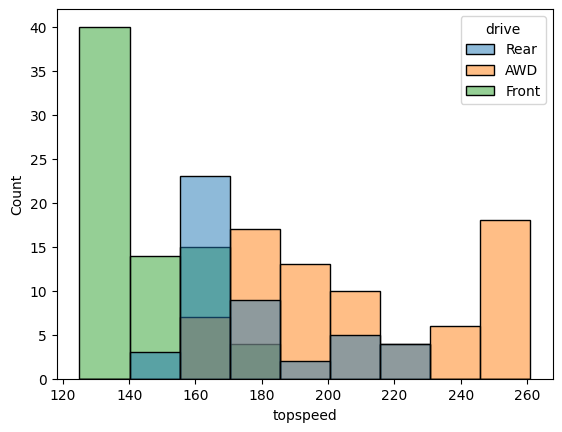

In [47]:
sns.histplot(data = df_ev, x="topspeed", hue = "drive")

<Axes: xlabel='batterycapacity', ylabel='topspeed'>

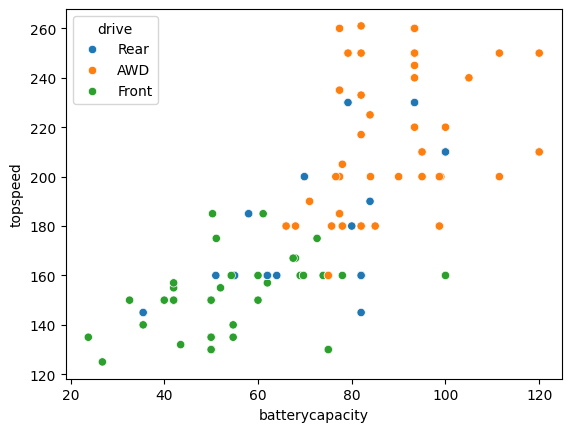

In [48]:
sns.scatterplot(data=df_ev, x="batterycapacity", y="topspeed", hue="drive")

<Axes: xlabel='drive', ylabel='topspeed'>

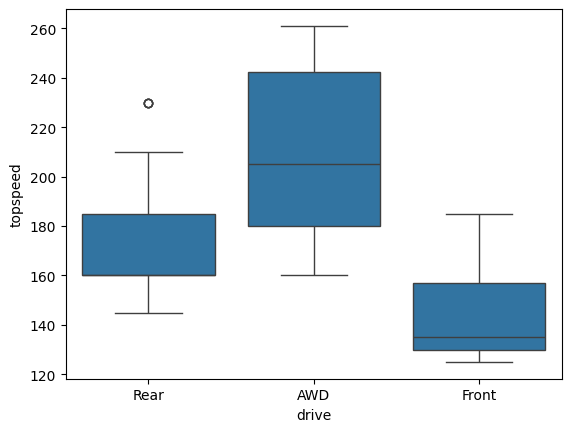

In [49]:
sns.boxplot(data = df_ev, x="drive", y="topspeed")

The data shows many interesating patterns in electric vehicles. AWD have a top speed of 200-210 km/h, FWD have a top speed of 135-145 km/h, and RWD have a top speed of 160-175 km/h. These only only confirm what we know, but this is easier to see and understand. AWD vehicles show the highest mean top speed (209.8 km/h) and largest battery capacity (88.3 kWh), which makes sense as these are typically performance-oriented vehicles requiring more power. 

## Part 2.3: Future Considerations (25 points)

1) Explicitly calculate the variance of all the numeric features in the raw `df_ev` data set, as well as the covariance matrix. 

Then, in a few sentences (**in a markdown cell**) discuss in detail:

(a) why some variances are larger than others, 

(b) why the covariances between the different features are not as useful as the correlations you calculated in Part 2.1 (**pick a couple** of example relationships to illustrate the point(s) you make, 

and (c) if the relationships we see between the features based on the correlation matrix from Part 2.1 are necessarily the true relationships between those features. Think about the meme that was shown in the class:

![d](https://miro.medium.com/v2/resize:fit:547/1*2BnD3YAUBGNutkKiG5dKfg.jpeg)

In [50]:
# Calculate variance for all numeric features
variances = df_ev.var(numeric_only=True)
print("Variances:")
print(variances)
print("\n")

Variances:
acceleration           10.038666
topspeed             1452.388361
electricrange       10278.791865
totalpower          15114.115913
totaltorque         49382.359810
batterycapacity       404.922219
chargespeed           243.919369
length             143049.769483
width                4722.348486
height              23179.887319
wheelbase           56914.286977
grossweight        172716.918354
dtype: float64




In [51]:
# Calculate covariance matrix
covariance_matrix = df_ev.cov(numeric_only=True)
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                 acceleration     topspeed  electricrange    totalpower  \
acceleration        10.038666  -105.351875    -227.482493   -325.912451   
topspeed          -105.351875  1452.388361    2730.560734   4320.033278   
electricrange     -227.482493  2730.560734   10278.791865   7944.660809   
totalpower        -325.912451  4320.033278    7944.660809  15114.115913   
totaltorque       -552.506025  7024.237968   13834.925218  24749.795577   
batterycapacity    -36.213742   509.695970    1760.754834   1728.165045   
chargespeed        -20.048900   169.335799     657.146921    355.204743   
length              11.399997  3525.397602    8429.326024  16114.824155   
width              -48.069676  1153.962769    1936.672988   4449.791144   
height             356.311012 -3922.751910   -8336.923375  -9979.290316   
wheelbase          180.853007   -58.100983    1480.904466   3358.385236   
grossweight        -71.458066  3976.754313   11345.072512  20151.268415   

     

a) Sometimes variances are larger than others because the data is spread out more than others. Also some data is just generally larger in value, like top speed is in the hundreds while acceleration is in the tens.

b) Covariance is not standardized and is affected by the scale of the variables, making it difficult to compare relationships between different pairs of features. For example, the covariance between battery capacity and range might be large simply because both variables are measured in large units (kWh and miles). 

c) No, correlation does not imply causation. This is quite a popular saying. Just because two variables are correlated does not mean that one causes the other. There could be lurking variables or confounding factors that influence both variables, leading to a spurious correlation. For example, ice cream sales and drowning incidents may be correlated because both increase during the summer months. But I dont think anyone is arguing that ice cream sales cause drownings.